In [1]:
! pip install verde harmonica

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.6/186.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.8/360.8 kB 11.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import harmonica as hm
import verde as vd

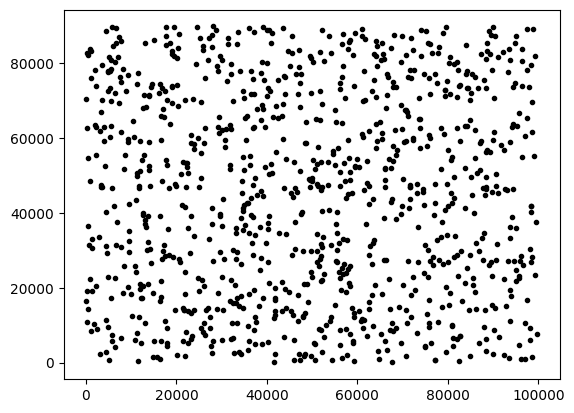

In [3]:
region = [0, 100e3, 0, 90e3]
coordinates = vd.scatter_points(region, size=1000, extra_coords=1000)

plt.plot(coordinates[0], coordinates[1], ".k")

In [4]:
prismas = [
    [10e3, 15e3, 20e3, 35e3, -1e3,  0],
    [60e3, 80e3, 50e3, 70e3, -2e3,  -0.5e3],
]
densidades = [500, -300]
gz = hm.prism_gravity(coordinates, prismas, densidades, field="g_z")

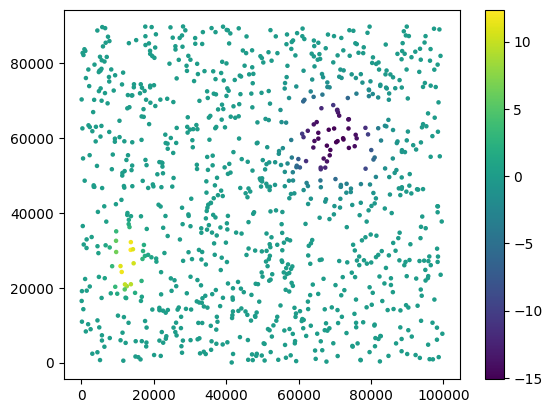

In [5]:
plt.scatter(coordinates[0], coordinates[1], s=5, c=gz)
plt.colorbar()

# Fontes Equivalentes

In [6]:
fontes = hm.EquivalentSourcesGB(damping=1,depth=1e3)
altura = np.zeros(1000)
fontes.fit([coordinates[0],coordinates[1],altura],data=gz) # o que faz essa funcao .fit?

EquivalentSourcesGB(damping=1, depth=1000.0)

In [7]:
grid_coords_eq = vd.grid_coordinates(region,spacing=1e3,extra_coords=1000)
gz_grid_eq = fontes.grid(grid_coords_eq,data_names="g_z")

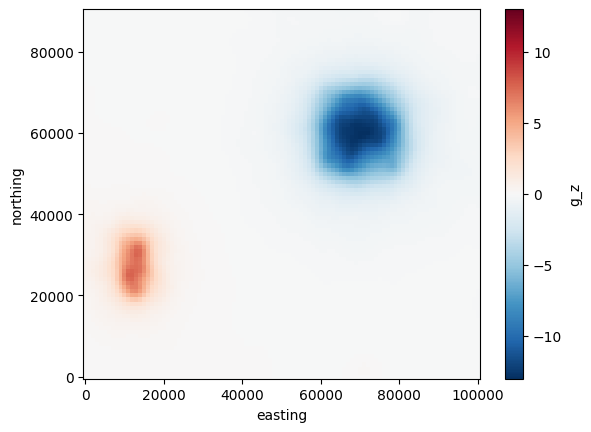

In [8]:
gz_grid_eq.g_z.plot()

# Malha regular

In [9]:
grid_coords = vd.grid_coordinates(region, spacing=1e3, extra_coords=1000)
gz_grid = hm.prism_gravity(grid_coords, prismas, densidades, field="g_z")
grid_true = vd.make_xarray_grid(grid_coords, gz_grid, data_names="g_z", extra_coords_names="upward")

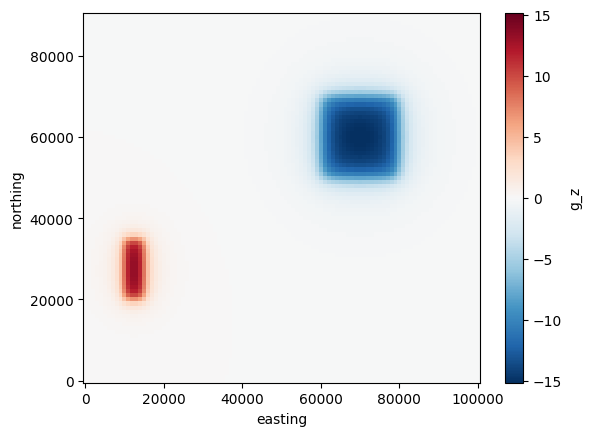

In [10]:
grid_true.g_z.plot()


# Diferenca

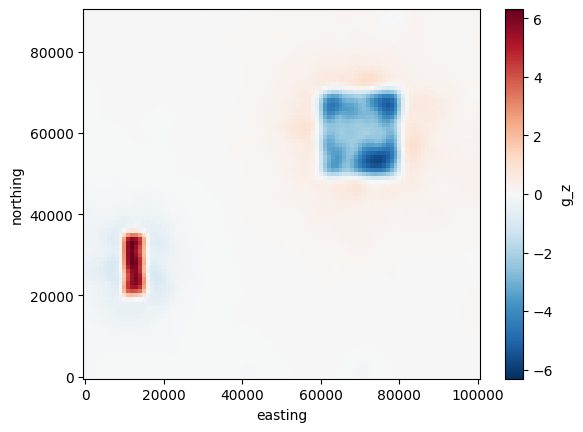

In [11]:
dif = grid_true - gz_grid_eq
dif.g_z.plot()